# Tutorial Overview

Prerequisites:
•you have implemented machine learning models yourself
•you know what deep learning is
•you have used numpy
•maybe you have used tensorflow or similar libs
•if you use PyTorch on a daily basis, this tutorial is probably not for you

Goals:
•understand PyTorch
•overview of all concepts
•be able to use transfer learning in PyTorch
•know some handy tools/libs



# PyTorch Overview


> "PyTorch - Tensors and Dynamic neural networks in Python
with strong GPU acceleration.
PyTorch is a deep learning framework for fast, flexible experimentation."
-- https://pytorch.org/*

![](img/dynamic_graph.gif)

# The Other libraries for deep learning
•torch
•TensorFlow
•MXNet
•Keras
•CNTK
•caffe
•caffe2
•many many more

References
•Twitter: https://twitter.com/PyTorch
•Tutorials: https://pytorch.org/tutorials/
•Examples: https://github.com/pytorch/examples
•API Reference: https://pytorch.org/docs/stable/index.html
•Torchvision: https://pytorch.org/docs/stable/torchvision/index.html
•PyTorch Text: https://github.com/pytorch/text
•PyTorch Audio: https://github.com/pytorch/audio
•Facebook AI Research Sequence-to-Sequence Toolkit written in PyTorch: https://github.com/pytorch/fairseq
•FastAI http://www.fast.ai/
•Stanford CS230 Deep Learning notes https://cs230-stanford.github.io


# Versions

In [43]:
import torch
torch.__version__

'0.4.1'

In [44]:
import torchvision
torchvision.__version__

'0.2.1'

In [45]:
import numpy as np
np.__version__

'1.14.3'

# PyTorch Basics

# Init, helpers, utils, ...

In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

In [5]:
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np

from IPython.core.debugger import set_trace

%matplotlib inline

# Tensors

tensors - the atoms of machine learning


# Tensors in numpy and pytorch

In [47]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import multi_dot as mdot

In [48]:
import torch

In [49]:
# numpy
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [50]:
# torch
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [51]:
# numpy
X = np.random.random((5, 3))
X

array([[0.5741698 , 0.35250539, 0.13904366],
       [0.76878253, 0.25478541, 0.48301982],
       [0.87906977, 0.83931179, 0.49337768],
       [0.66706167, 0.09558871, 0.26496556],
       [0.57078431, 0.03566482, 0.68512815]])

In [52]:
# pytorch
Y = torch.rand((5, 3))
Y

tensor([[0.6293, 0.8402, 0.9496],
        [0.8855, 0.3726, 0.0148],
        [0.1101, 0.0812, 0.6591],
        [0.0416, 0.1309, 0.4909],
        [0.8975, 0.5165, 0.2812]])

In [12]:
X.shape

(5, 3)

In [13]:
Y.shape

torch.Size([5, 3])

In [14]:
A = torch.eye(3)
A.add(1)

tensor([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]])

In [15]:
A

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [16]:
A.add_(1)
A

tensor([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]])

# Layers : Fundamental blocks of Neural Network

In [53]:
import torch
from torch.nn import Linear, ReLU
import torch.nn as nn
import numpy as np
from torch.autograd import Variable

In [54]:
myLayer = Linear(in_features=10,out_features=5,bias=True)
inp = Variable(torch.randn(1,10))
myLayer = Linear(in_features=10,out_features=5,bias=True) 
myLayer(inp)

tensor([[ 0.1427, -0.3085,  0.3076,  0.0849, -0.0213]], grad_fn=<ThAddmmBackward>)

In [19]:
myLayer.weight

Parameter containing:
tensor([[ 0.0716,  0.1070,  0.1401, -0.1882,  0.2411, -0.1106, -0.0088, -0.2605,
         -0.2624,  0.0546],
        [-0.0088, -0.1735, -0.1660,  0.2673,  0.2763,  0.1156, -0.0650, -0.0535,
         -0.1501, -0.2498],
        [-0.2418, -0.1802, -0.1770,  0.1397, -0.2949, -0.1457, -0.1210, -0.1899,
          0.1367,  0.1737],
        [-0.1709,  0.0913,  0.0792, -0.0100, -0.2654, -0.3160, -0.0837,  0.2616,
          0.0731, -0.3105],
        [ 0.0057, -0.1962, -0.1376, -0.0453,  0.0574, -0.1765, -0.0533,  0.2376,
          0.0391,  0.3130]], requires_grad=True)

In [55]:
myLayer.bias

Parameter containing:
tensor([ 0.0956,  0.1297, -0.1820,  0.0370,  0.0199], requires_grad=True)

# PyTorch Non-linear Activations

In [56]:
sample_data = Variable(torch.Tensor([[1,2,-1,-1]])) 
myRelu = ReLU()
myRelu(sample_data)

tensor([[1., 2., 0., 0.]])

In [57]:
import torch.nn as nn
import torch.nn.functional as F
sample_data = Variable(torch.Tensor([[1,2,-1,-1]])) 
f = F.relu(sample_data) # Much simpler.
f

tensor([[1., 2., 0., 0.]])

# Data Download and testing

In [23]:
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
from torchvision import transforms
from torchvision import models
import torch
from torch.autograd import Variable
import torch.nn as nn
from torch.optim import lr_scheduler
from torch import optim
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
import time
%matplotlib inline

In [24]:
def imshow(inp):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)

# Create validation data set

In [58]:

# https://www.kaggle.com/c/dogs-vs-cats downlaod the dataset and use your computer link

path = 'C:/Users/UTP/Desktop/Pythonbooks/data1/dogsandcats'

In [59]:
files = glob(os.path.join(path,'*/*.jpg'))

In [60]:
print(f'Total no of images {len(files)}')

Total no of images 0


In [61]:
no_of_images = 25000

In [62]:
no_of_images = len(files)

In [63]:
no_of_images*0.8

0.0

In [64]:
shuffle = np.random.permutation(no_of_images)

In [65]:
for i in shuffle[:2000]:
    #shutil.copyfile(files[i],'../chapter3/dogsandcats/valid/')
    folder = files[i].split('/')[-1].split('.')[0]
    image = files[i].split('/')[-1]
    os.rename(files[i],os.path.join(path,'valid',folder,image))

In [66]:
for i in shuffle[2000:]:
    #shutil.copyfile(files[i],'../chapter3/dogsandcats/valid/')
    folder = files[i].split('/')[-1].split('.')[0]
    image = files[i].split('/')[-1]
    os.rename(files[i],os.path.join(path,'train',folder,image))

# Check if GPU is present

In [67]:
if torch.cuda.is_available():
    is_cuda = True

# Load data into PyTorch tensors

In [68]:
simple_transform = transforms.Compose([transforms.Resize((224,224))
                                       ,transforms.ToTensor()
                                       ,transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
train = ImageFolder('C:/Users/UTP/Desktop/Pythonbooks/data1/dogsandcats/train/',simple_transform)
valid = ImageFolder('C:/Users/UTP/Desktop/Pythonbooks/data1/dogsandcats/valid/',simple_transform)

In [69]:
print(train.class_to_idx)
print(train.classes) 

{'cat': 0, 'cats': 1, 'dog': 2, 'dogs': 3}
['cat', 'cats', 'dog', 'dogs']


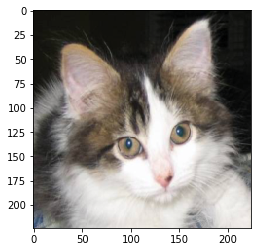

In [70]:
imshow(train[52][0])

# Weights and baises of pre-trained Networks

# import torchvision.models as models
resnet18 = models.resnet18()
alexnet = models.alexnet()
vgg16 = models.vgg16()
squeezenet = models.squeezenet1_0()
densenet = models.densenet161()
inception = models.inception_v3()

# These can be constructed by passing pretrained=True:

import torchvision.models as models
resnet18 = models.resnet18(pretrained=True)
alexnet = models.alexnet(pretrained=True)
squeezenet = models.squeezenet1_0(pretrained=True)
vgg16 = models.vgg16(pretrained=True)
densenet = models.densenet161(pretrained=True)
inception = models.inception_v3(pretrained=True)

In [40]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd
import torch.autograd as Variable

In [41]:
import torchvision.models as models
alexnet = models.alexnet()

In [42]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_feature

In [71]:
alexnet.features[0]

Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))

In [72]:
Weights1=alexnet.features[0].weight

In [73]:
Weights1

Parameter containing:
tensor([[[[ 4.9623e-02, -4.2561e-02,  8.1229e-03,  ..., -3.3468e-02,
            3.3768e-02, -2.8501e-02],
          [-2.6628e-02,  2.4971e-03,  1.9835e-02,  ...,  2.4164e-02,
            5.0365e-02,  2.1778e-02],
          [-1.8695e-02,  4.4867e-02,  1.2958e-02,  ...,  1.1236e-02,
           -3.8377e-02, -4.8797e-02],
          ...,
          [ 1.1894e-02, -8.3151e-03,  2.7656e-02,  ..., -1.5279e-02,
            9.6467e-03, -2.4957e-02],
          [-4.6668e-02, -2.1237e-02,  5.0330e-02,  ..., -2.8713e-02,
            1.9081e-02, -3.8028e-02],
          [ 2.1412e-02, -3.2898e-02, -1.0557e-02,  ...,  2.1633e-02,
           -1.1116e-02,  3.3504e-02]],

         [[ 1.4615e-02, -2.9147e-02, -5.1625e-02,  ..., -3.6182e-02,
           -4.5420e-02,  2.6446e-02],
          [-2.8822e-03,  5.0896e-02, -3.3538e-02,  ..., -6.0065e-03,
            7.8978e-03,  1.9600e-02],
          [-3.7312e-02, -3.8352e-02, -1.8986e-02,  ...,  1.9276e-02,
            4.6594e-02,  3.1994e-02]

In [74]:
bias1=alexnet.features[0].bias

In [75]:
bias1

Parameter containing:
tensor([-0.0036,  0.0284,  0.0437, -0.0516,  0.0468, -0.0244, -0.0429,  0.0146,
        -0.0330, -0.0489,  0.0012, -0.0045,  0.0340,  0.0238, -0.0075, -0.0344,
        -0.0407,  0.0420, -0.0466,  0.0064,  0.0046, -0.0459, -0.0205,  0.0511,
        -0.0224, -0.0170,  0.0210, -0.0216, -0.0433,  0.0385,  0.0232, -0.0019,
        -0.0325,  0.0483,  0.0249,  0.0131,  0.0093, -0.0072,  0.0328,  0.0237,
        -0.0254,  0.0520, -0.0343,  0.0443, -0.0244,  0.0112, -0.0456, -0.0013,
         0.0149, -0.0169,  0.0271, -0.0201, -0.0068, -0.0043,  0.0372,  0.0495,
         0.0181,  0.0407, -0.0337,  0.0182,  0.0177, -0.0259, -0.0285,  0.0059],
       requires_grad=True)

In [76]:
bias1.shape

torch.Size([64])

In [77]:
Weights1.shape

torch.Size([64, 3, 11, 11])

In [102]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0
model = Net().to(device)

summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 24, 24]             260
            Conv2d-2             [-1, 20, 8, 8]           5,020
         Dropout2d-3             [-1, 20, 8, 8]               0
            Linear-4                   [-1, 50]          16,050
            Linear-5                   [-1, 10]             510
Total params: 21,840
Trainable params: 21,840
Non-trainable params: 0
----------------------------------------------------------------


In [25]:
nn.Conv2d?

# Classification using Dogandcats from sctrach-based CNN

In [ ]:
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
from torchvision import transforms
from torchvision import models
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import lr_scheduler
from torch import optim
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
from torch.utils.data import Dataset,DataLoader
import time
%matplotlib inline

In [ ]:
def imshow(inp,cmap=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp,cmap)

# Load data into PyTorch tensors

In [ ]:
simple_transform = transforms.Compose([transforms.Resize((224,224))
                                       ,transforms.ToTensor()
                                       ,transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                      ])
train = ImageFolder('C:/Users/UTP/Desktop/Pythonbooks/data1/dogsandcats/train/',simple_transform)
valid = ImageFolder('C:/Users/UTP/Desktop/Pythonbooks/data1/dogsandcats/valid/',simple_transform)

# Load Minimbatches from the dataset

In [63]:
train_data_loader = torch.utils.data.DataLoader(train,batch_size=32,num_workers=3,shuffle=True)
valid_data_loader = torch.utils.data.DataLoader(valid,batch_size=32,num_workers=3,shuffle=True)

In [64]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(56180, 500)
        self.fc2 = nn.Linear(500,50)
        self.fc3 = nn.Linear(50, 2)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))
        x = F.dropout(x,training=self.training)
        x = self.fc3(x)
        return F.log_softmax(x,dim=1)

In [65]:
model = Net()
#if is_cuda:
 #   model.cuda()

In [86]:
model

Net(
  (conv1): Conv2d(3, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5)
  (fc1): Linear(in_features=56180, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)

In [66]:
optimizer = optim.SGD(model.parameters(),lr=0.01,momentum=0.5)

In [67]:
def fit(epoch,model,data_loader,phase='training',volatile=False):
    if phase == 'training':
        model.train()
    if phase == 'validation':
        model.eval()
        volatile=True
    running_loss = 0.0
    running_correct = 0
    for batch_idx , (data,target) in enumerate(data_loader):
        if is_cuda:
            data,target = data.cuda(),target.cuda()
        data , target = Variable(data,volatile),Variable(target)
        if phase == 'training':
            optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output,target)
        
        running_loss += F.nll_loss(output,target,size_average=False).data[0]
        preds = output.data.max(dim=1,keepdim=True)[1]
        running_correct += preds.eq(target.data.view_as(preds)).cpu().sum()
        if phase == 'training':
            loss.backward()
            optimizer.step()
    
    loss = running_loss/len(data_loader.dataset)
    accuracy = 100. * running_correct/len(data_loader.dataset)
    
    print(f'{phase} loss is {loss:{5}.{2}} and {phase} accuracy is {running_correct}/{len(data_loader.dataset)}{accuracy:{10}.{4}}')
    return loss,accuracy

In [ ]:
train_losses , train_accuracy = [],[]
val_losses , val_accuracy = [],[]
for epoch in range(1,20):
    epoch_loss, epoch_accuracy = fit(epoch,model,train_data_loader,phase='training')
    val_epoch_loss , val_epoch_accuracy = fit(epoch,model,valid_data_loader,phase='validation')
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)

# Transfer Learning tutorial
Based on Pre-trained Model we can make transfer learning based on hymenoptera dataset

In [1]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()   # interactive mode

In [2]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
data_dir = 'C:/Users/UTP/Desktop\Pythonbooks/hymenoptera_data/'
#data_dir = 'hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

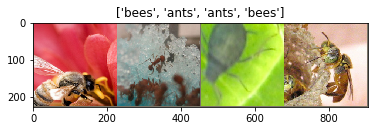

In [3]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [4]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=3):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [5]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

# Finetuning the convnet
Load a pretrained model and reset final fully connected layer.

In [6]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

# Train and evaluate
It should take around 15-25 min on CPU. On GPU though, it takes less than a minute.

In [7]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=3)

Epoch 0/2
----------
train Loss: 0.5968 Acc: 0.6967
val Loss: 0.3262 Acc: 0.8693

Epoch 1/2
----------
train Loss: 0.6584 Acc: 0.7418
val Loss: 0.3075 Acc: 0.9020

Epoch 2/2
----------
train Loss: 0.5337 Acc: 0.8074
val Loss: 0.2676 Acc: 0.8562

Training complete in 3m 46s
Best val Acc: 0.901961


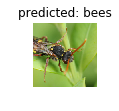

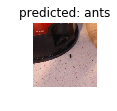

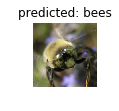

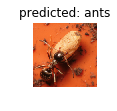

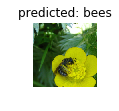

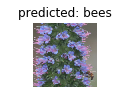

In [8]:
visualize_model(model_ft)